In [1]:
"""Trying to do a curve-of-best-fit to the current coronavirus cases in the UK and keep track """

# For that I will need the data points (day,cases) and will try to approximate what happens
# if we continue with that tendency 
# check for improvements 

'Trying to do a curve-of-best-fit to the current coronavirus cases in the UK and keep track '

In [2]:
# Import important packages first as always
# Im following this: https://stackoverflow.com/questions/19165259/python-numpy-scipy-curve-fitting
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import datetime as dt

In [4]:
# Getting data points (x-axis) so far:
# First cases: January 31st
# Counting the days using datetime module

now = dt.datetime.now()

# creating date: (year,month,day)

d_day = dt.datetime(2020,1,31)  # when virus started
t_day = dt.datetime.now()

# day from 001 to 366 which it started
day_zero = d_day.strftime("%j")
day_n    = t_day.strftime("%j")

print("day zero", day_zero)
print("today", day_n)

int_days = int(day_n) - int(day_zero)
# create list with all the day up until today
days = []
for i in range(int_days):
    d = i 
    days.append(d)

x_days = np.array(days)

    


day zero 031
today 079


In [5]:
# Getting data points (y-axis)

# Im first doing it by hand to get it working but will aim to automatically download from the
# gov website and then it updates automatically

cases = [2,2,2,2,2,2,3,3,3,4,8,8,8,9,9,9,9,9,9,9,9,9,9,9,13,13,13,13,19,23,35,40,51,85,114,160,
        206,271,321,373,456,590,797,1061,1391,1543,1950,2696]

y_cases = np.array(cases)

# comparing they match:

print(len(y_cases))
print(len(x_days))

48
48


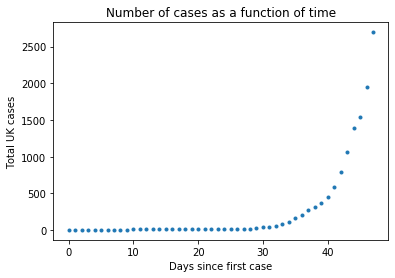

In [11]:
# Making rough graph to visualize

plt.plot(x_days,y_cases, ".")
plt.xlabel('Days since first case')
plt.ylabel('Total UK cases')
plt.title("Number of cases as a function of time")
plt.show()

In [17]:
# Now we are going to do the approximation

# curve_fit also requires a function that provides the type of fit you would like. 
# For instance, a linear fit would use a function like

# def func(x, a, b):
    # return a*x + b
    
def func(days, a, d):
    return a*(d**(days))


params = curve_fit(func, days, cases)

# scipy.optimize.curve_fit(func, x, y) will return a numpy array containing two arrays: 
# the first will contain values for a and b that best fit your data (in this case a and d)
# and the second will be the covariance of the optimal fit parameters.

# Therefore the best way to approximate current data is using:
# y = 0.03393585 * (1.2705752) ^ d
print(params[0])

[0.03393585 1.2705752 ]


In [27]:
# Now that we have the parameters of our exponential lets make another rough sketch following the function using
# test data and see how it compares to the previous one

def func_fit(test_days, j, k):
    return j*(k**test_days)

j = params[0][0]
k = params[0][1]

# lets use the same domain of days:

test_days  = np.linspace(0,54,55)
test_cases = []

for i in range(len(test_days)):
    n_cases = func_fit(test_days[i],j,k)
    test_cases.append(n_cases)

test_days, np.array(test_cases)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54.]),
 array([3.39358546e-02, 4.31180553e-02, 5.47847318e-02, 6.96081217e-02,
        8.84423533e-02, 1.12372661e-01, 1.42777916e-01, 1.81410080e-01,
        2.30495149e-01, 2.92861421e-01, 3.72102459e-01, 4.72784157e-01,
        6.00707825e-01, 7.63244467e-01, 9.69759493e-01, 1.23215236e+00,
        1.56554224e+00, 1.98913915e+00, 2.52735087e+00, 3.21118935e+00,
        4.08005755e+00, 5.18401995e+00, 6.58668719e+00, 8.36888141e+00,
        1.06332932e+01, 1.35103986e+01, 1.71659775e+01, 2.18106653e+01,
        2.77120905e+01, 3.52102950e+01, 4.47373277e+01, 5.68421391e+01,
        7.22222124e+01, 9.17637522e+01, 1.16592748e+02, 1.48139854e+02,
        1.88222825e+02, 2.39151254e

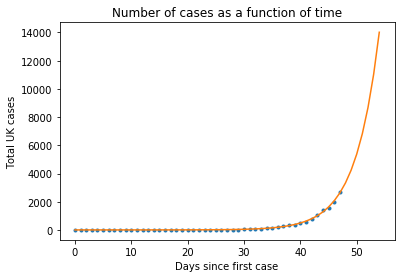

In [25]:
# Comparing fit curve to data:

plt.plot(x_days,y_cases, ".")
plt.plot(test_days, test_cases)
plt.xlabel('Days since first case')
plt.ylabel('Total UK cases')
plt.title("Number of cases as a function of time")
plt.show()